In [1]:
# Importing required packaages
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Loading data into memory
data = pd.read_csv("iris.csv") # your path here

In [3]:
# Exploring data
print(len(data))
data.head()

150


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dropping Label from data
data = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Calculating elbow as an estimate for appropriate K value

# number of clusters considered = 1 to 10
K = range(1,10)

# training data on each K
KM = [KMeans(n_clusters = k).fit(data) for k in K]

# fetching centroids from each K
centroids = [k.cluster_centers_ for k in KM]

In [6]:
# Computing distance between centroid and data objects
D_k = [cdist(data, cent, 'euclidean') for cent in centroids]

# Computing the minimum distance 
min_dist = [np.min(D, axis=1) for D in D_k]

# Computing within-cluster sum of square
WSS = [sum(d)/len(data) for d in min_dist]

Text(0.5,1,'Elbow for KMean Clustering')

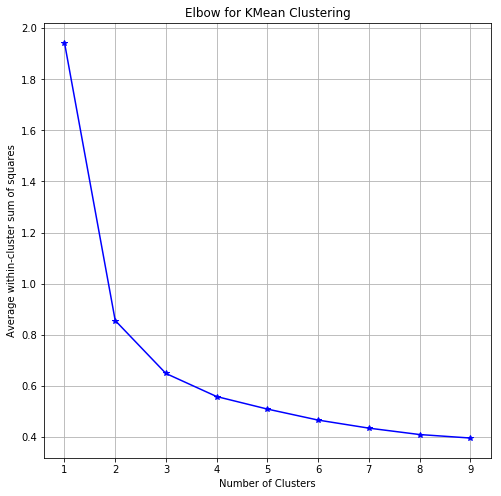

In [7]:
# Plotting the cluster sum of squares

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.plot(K, WSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMean Clustering')

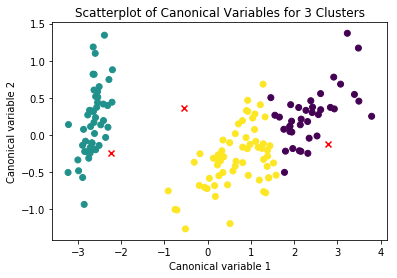

In [8]:
# Modelling KMeans with K=3
k = 3
model3 = KMeans(n_clusters=k).fit(data)
prediction = model3.predict(data)
centers = centroids[k-1]

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(data)
plot_centers = pca_2.fit_transform(centers)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.scatter(x=plot_centers[:,0], y=plot_centers[:,1], marker="x", color='r') # centroids
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

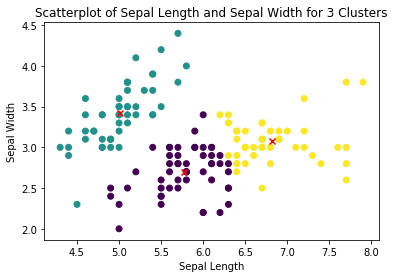

In [9]:
# Clustering : Sepal Length and Width Features 
sepal_data = data[['Sepal Length','Sepal Width']]
k = 3
model3 = KMeans(n_clusters=k).fit(sepal_data)
prediction = model3.predict(sepal_data)
centers = np.array(model3.cluster_centers_)

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(sepal_data)
plot_centers = pca_2.fit_transform(centers)
plt.scatter(sepal_data['Sepal Length'], sepal_data['Sepal Width'], c=model3.labels_,)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r') # centroids
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatterplot of Sepal Length and Sepal Width for 3 Clusters')
plt.show()

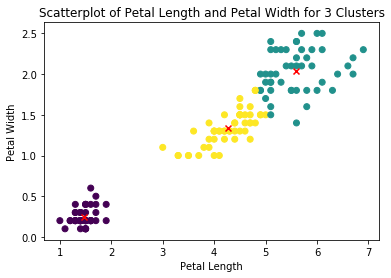

In [10]:
# Clustering : Petal Length and Width Features 
sepal_data = data[['Petal Length','Petal Width']]
k = 3
model3 = KMeans(n_clusters=k).fit(sepal_data)
prediction = model3.predict(sepal_data)
centers = np.array(model3.cluster_centers_)

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(sepal_data)
plot_centers = pca_2.fit_transform(centers)
plt.scatter(sepal_data['Petal Length'], sepal_data['Petal Width'], c=model3.labels_,)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r') # centroids
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatterplot of Petal Length and Petal Width for 3 Clusters')
plt.show()